In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# List of 25 popular large-cap companies
tickers = [
    "AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "NVDA", "NFLX", "ORCL", "INTC",
    "IBM", "ADBE", "AMD", "PYPL", "CSCO", "JPM", "BAC", "WMT", "DIS", "PEP",
    "KO", "PFE", "NKE", "XOM", "UNH"
]


In [ ]:
# Download data for all tickers
data = yf.download(tickers, start="2020-01-01", end="2025-01-01", group_by='ticker')



/tmp/ipython-input-3067511915.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01", end="2025-01-01", group_by='ticker')
[*********************100%***********************]  25 of 25 completed


In [ ]:
# Create a dataframe
close_data = pd.DataFrame({ticker: data[ticker]['Close'] for ticker in tickers})
close_data.dropna(inplace=True)  # remove missing values

print(close_data.head())


                 AAPL        MSFT      GOOGL       AMZN        META  \
Date                                                                  
2020-01-02  72.538528  152.791122  67.965233  94.900497  208.494659   
2020-01-03  71.833305  150.888596  67.609680  93.748497  207.391479   
2020-01-06  72.405693  151.278641  69.411766  95.143997  211.297409   
2020-01-07  72.065170  149.899323  69.277687  95.343002  211.754593   
2020-01-08  73.224411  152.286911  69.770775  94.598503  213.901367   

                 TSLA      NVDA        NFLX       ORCL       INTC         IBM  \
Date                                                                            
2020-01-02  28.684000  5.971410  329.809998  49.537437  53.666470  100.565201   
2020-01-03  29.534000  5.875832  325.899994  49.362968  53.013714   99.763145   
2020-01-06  30.102667  5.900472  335.829987  49.620075  52.863762   99.584953   
2020-01-07  31.270666  5.971909  330.750000  49.730255  51.981670   99.651772   
2020-01-08  32.8

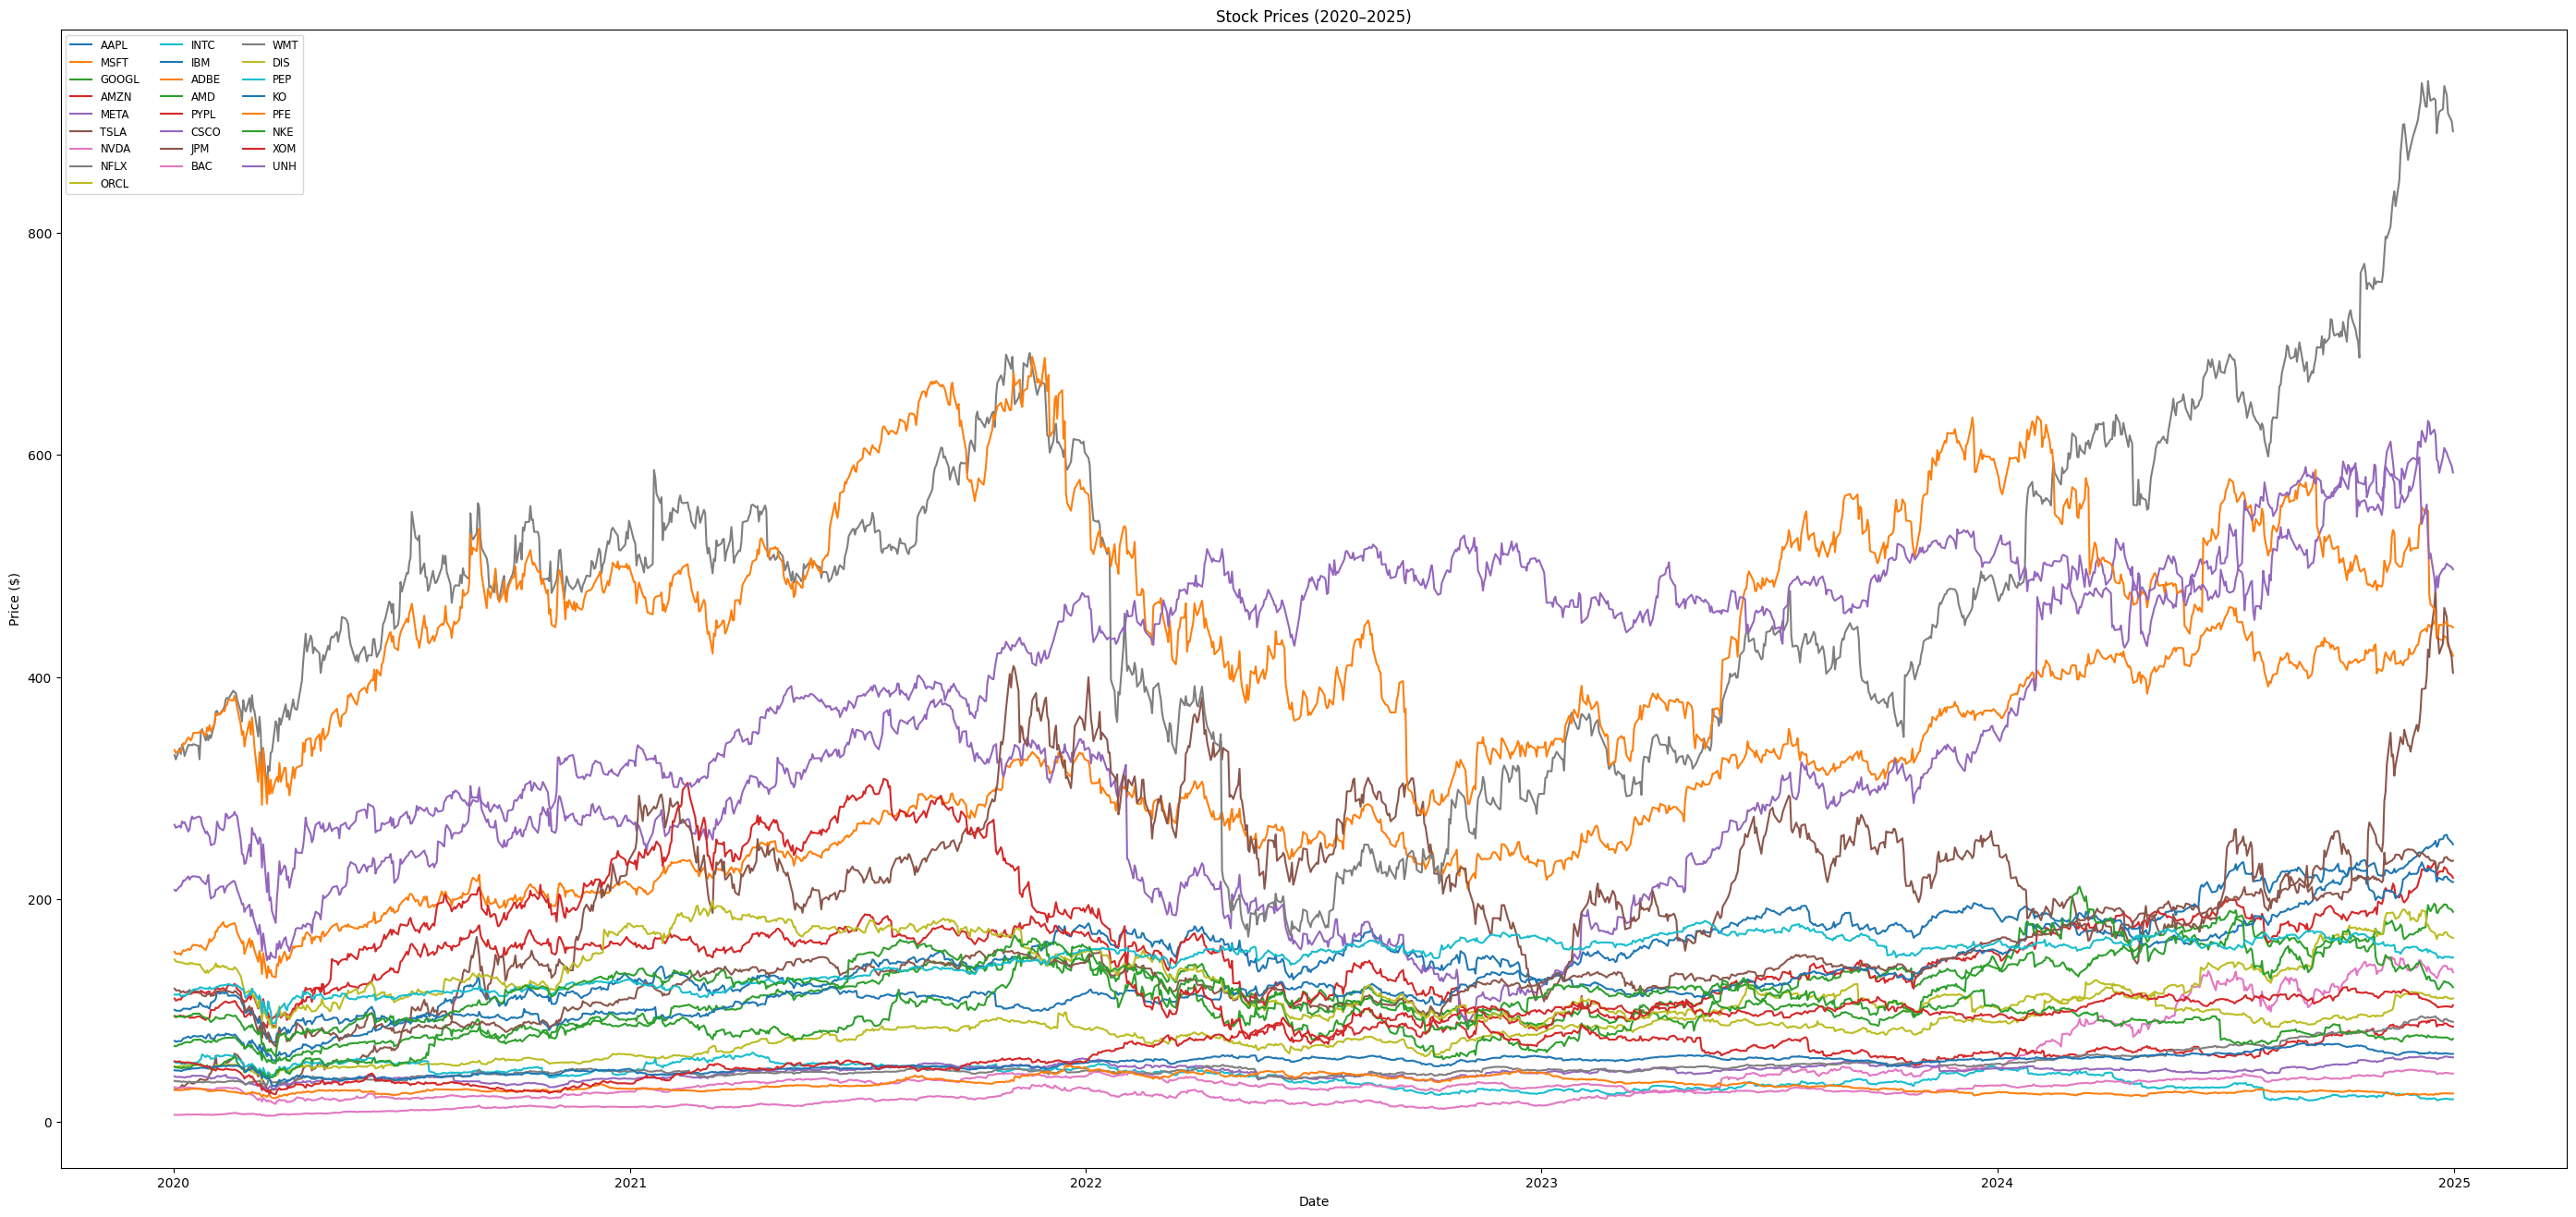

In [ ]:
plt.figure(figsize=(35,16))
for ticker in tickers:
    plt.plot(close_data.index, close_data[ticker], label=ticker)
plt.title("Stock Prices (2020–2025)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend(ncol=3, fontsize='small')
plt.show()


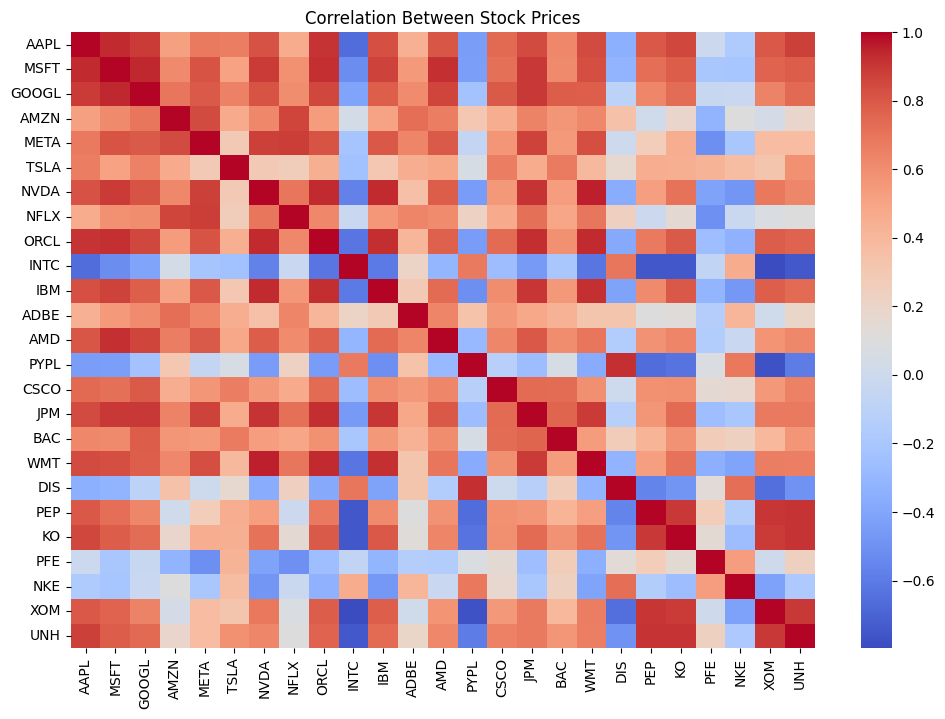

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(close_data.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Between Stock Prices")
plt.show()


In [ ]:
returns = close_data.pct_change().dropna()
volatility = returns.rolling(window=20).std()

volatility['Average_Volatility'] = volatility.mean(axis=1)


In [ ]:
features = []
targets = []
companies = []

for ticker in tickers:
    df = close_data[[ticker]].copy()
    df['Return'] = df[ticker].pct_change()
    df['MA20'] = df[ticker].rolling(window=20).mean()
    df['MA50'] = df[ticker].rolling(window=50).mean()
    df['Target'] = df[ticker].shift(-1)
    df.dropna(inplace=True)

    X = df[[ticker, 'Return', 'MA20', 'MA50']]
    y = df['Target']

    features.append(X)
    targets.append(y)
    companies.append(ticker)


In [ ]:
results = {}

for i, ticker in enumerate(companies):
    X_train, X_test, y_train, y_test = train_test_split(
        features[i], targets[i], test_size=0.2, shuffle=False
    )

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    results[ticker] = {'R2': r2, 'MSE': mse, 'Model': model}

    print(f"{ticker}: R² = {r2:.3f}, MSE = {mse:.2f}")


AAPL: R² = -0.241, MSE = 816.52
MSFT: R² = -4.784, MSE = 1462.05
GOOGL: R² = -1.557, MSE = 565.92
AMZN: R² = -0.048, MSE = 277.06
META: R² = -6.737, MSE = 23601.16
TSLA: R² = 0.942, MSE = 302.39
NVDA: R² = -4.829, MSE = 3604.63
NFLX: R² = 0.252, MSE = 8240.81
ORCL: R² = -1.163, MSE = 1401.13
INTC: R² = 0.897, MSE = 7.70
IBM: R² = -2.193, MSE = 1495.95
ADBE: R² = 0.908, MSE = 194.35
AMD: R² = -0.017, MSE = 337.69
PYPL: R² = 0.968, MSE = 3.21
CSCO: R² = 0.953, MSE = 0.91
JPM: R² = -3.029, MSE = 1792.18
BAC: R² = 0.958, MSE = 0.64
WMT: R² = -2.177, MSE = 443.31
DIS: R² = 0.955, MSE = 4.09
PEP: R² = 0.897, MSE = 3.42
KO: R² = -0.430, MSE = 25.03
PFE: R² = 0.852, MSE = 0.26
NKE: R² = 0.913, MSE = 8.13
XOM: R² = 0.656, MSE = 14.20
UNH: R² = 0.478, MSE = 1085.76


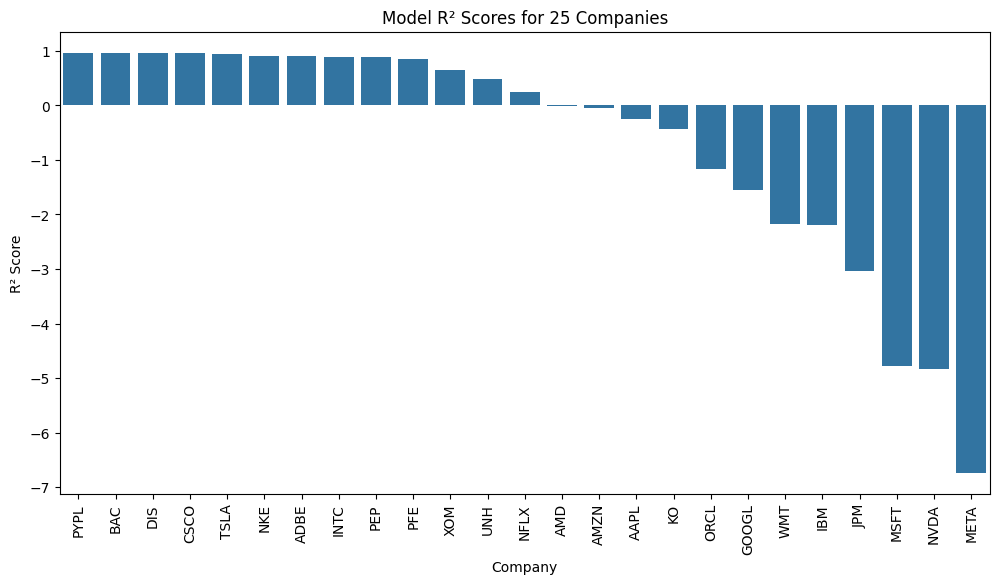

In [ ]:
performance = pd.DataFrame(results).T[['R2', 'MSE']].sort_values(by='R2', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=performance.index, y=performance['R2'])
plt.xticks(rotation=90)
plt.title('Model R² Scores for 25 Companies')
plt.xlabel('Company')
plt.ylabel('R² Score')
plt.show()


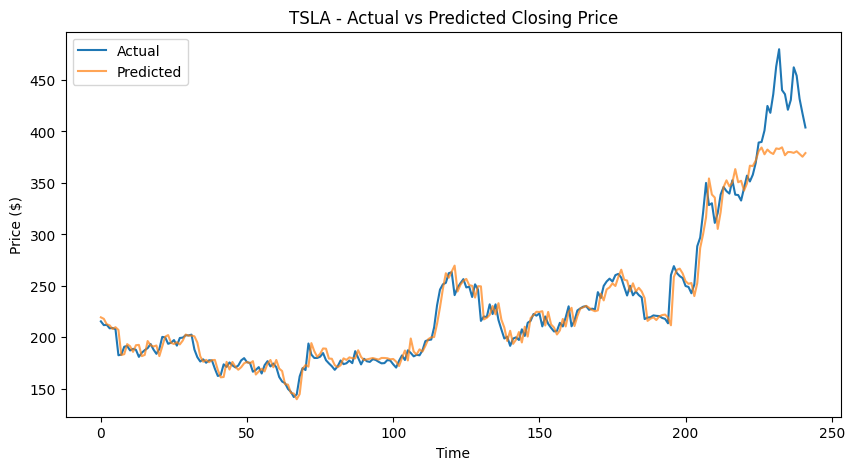

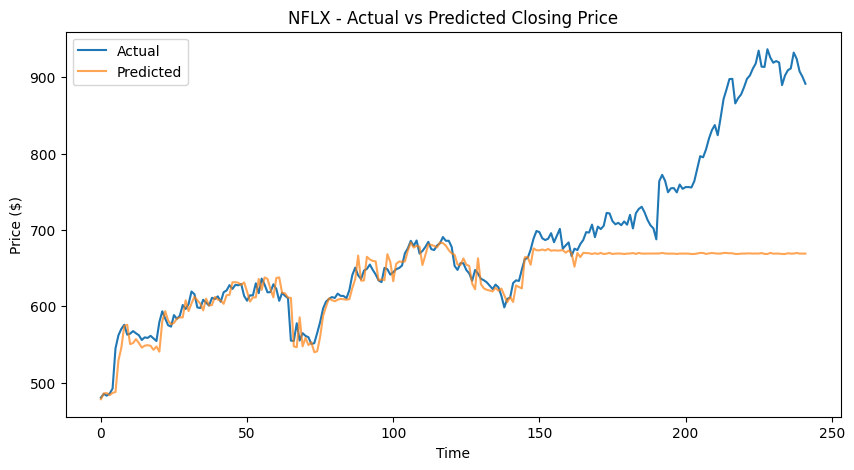

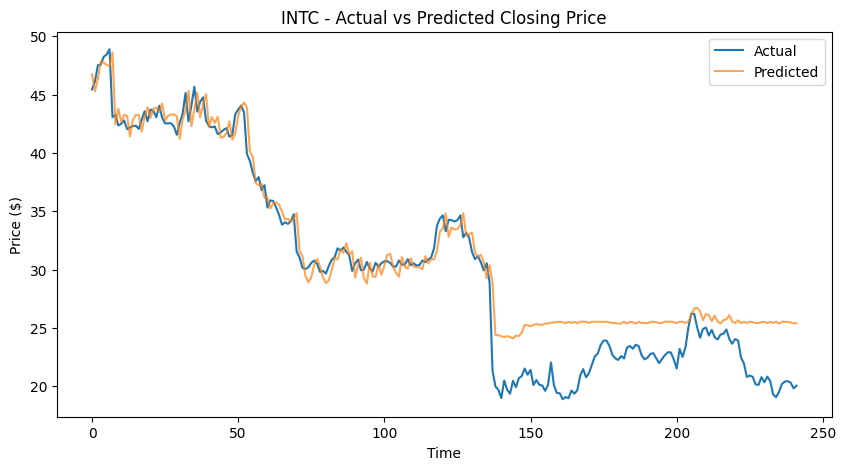

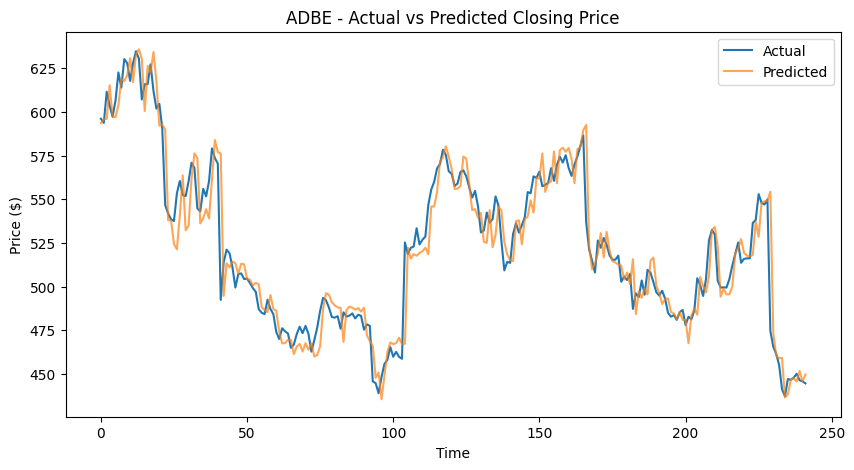

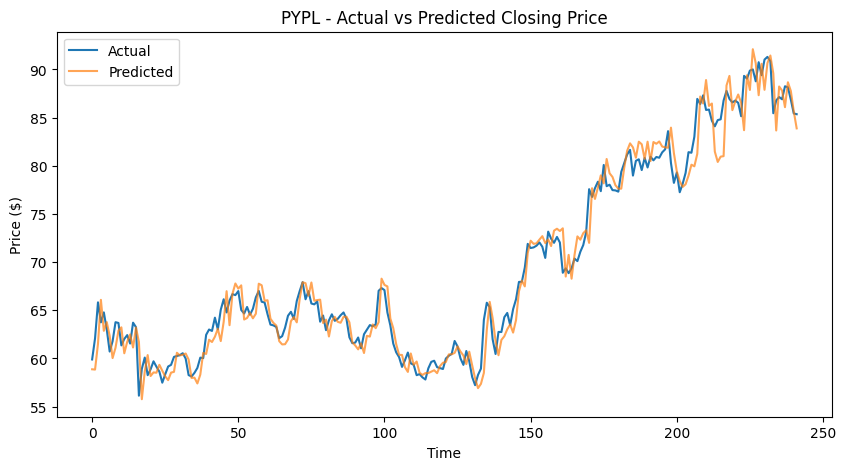

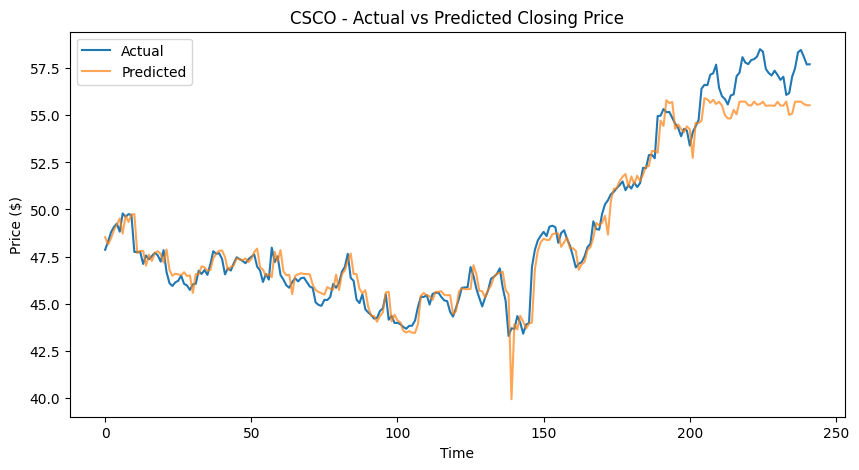

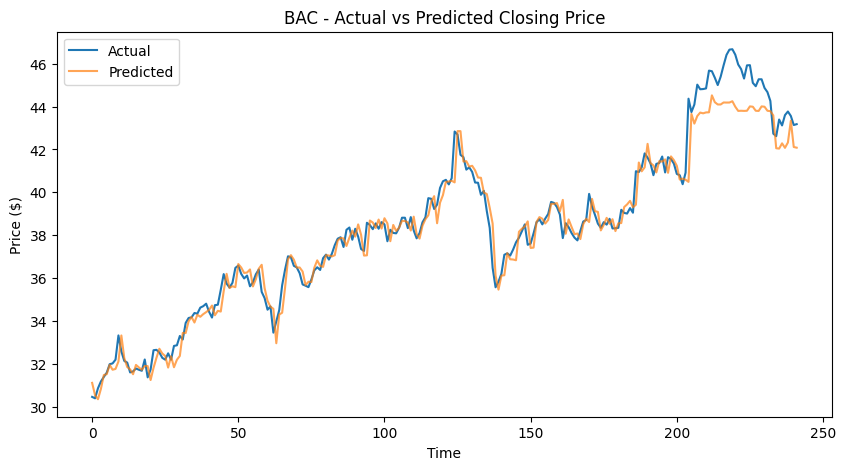

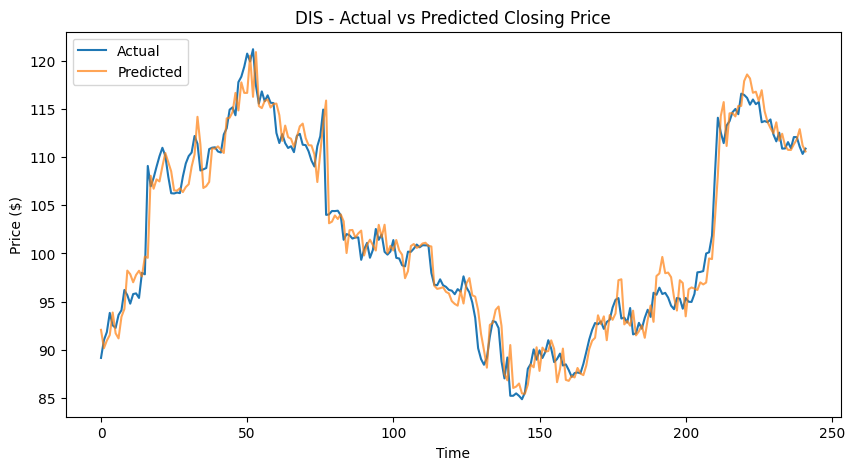

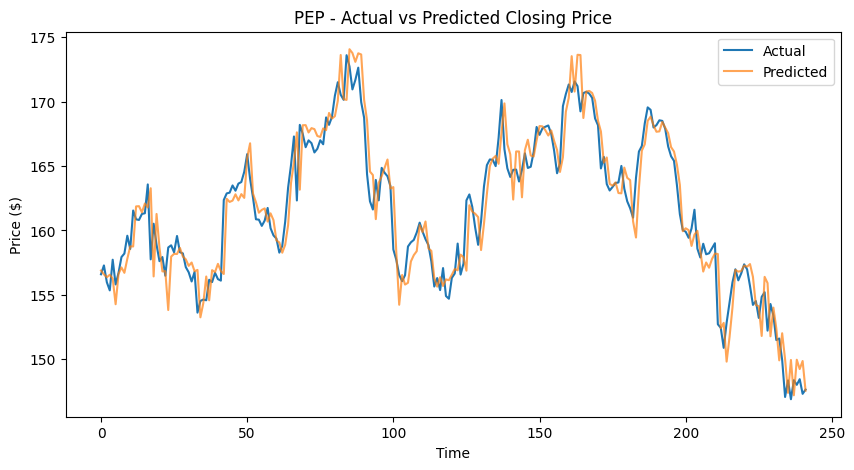

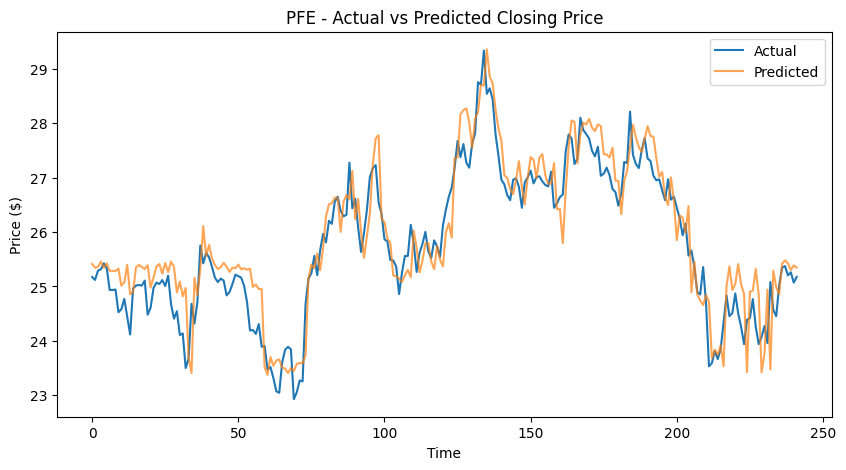

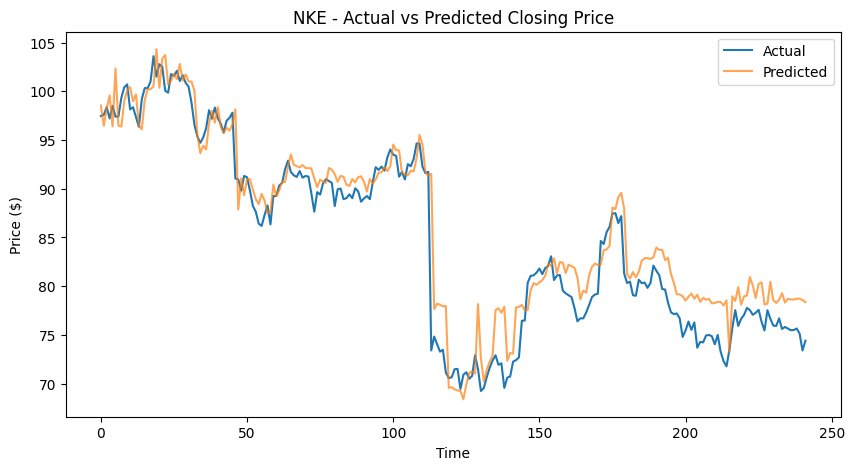

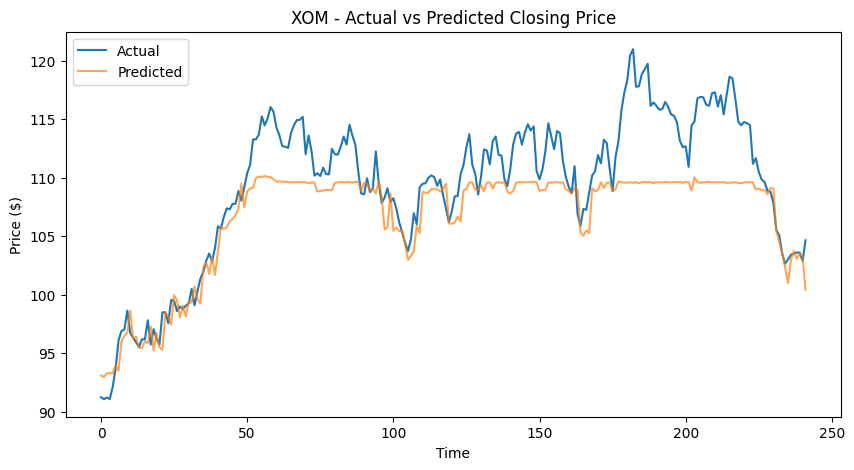

In [ ]:
sample_tickers = ["TSLA", "NFLX", "INTC", "ADBE", "PYPL", "CSCO", "BAC", "DIS", "PEP", "PFE", "NKE", "XOM"]

for ticker in sample_tickers:
    model = results[ticker]['Model']
    df = close_data[[ticker]].copy()
    df['Return'] = df[ticker].pct_change()
    df['MA20'] = df[ticker].rolling(window=20).mean()
    df['MA50'] = df[ticker].rolling(window=50).mean()
    df['Target'] = df[ticker].shift(-1)
    df.dropna(inplace=True)

    X = df[[ticker, 'Return', 'MA20', 'MA50']]
    y = df['Target']
    _, X_test, _, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    y_pred = model.predict(X_test)

    plt.figure(figsize=(10,5))
    plt.plot(y_test.values, label='Actual')
    plt.plot(y_pred, label='Predicted', alpha=0.7)
    plt.title(f'{ticker} - Actual vs Predicted Closing Price')
    plt.xlabel('Time')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.show()


In [ ]:
performance.to_csv("multi_company_model_performance.csv")
